# Data Preprocessing: Case Study of Kebotakan

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, clear_output

from src.utils import MissingDataViewer
from src.preprocess import convert_col

## Load Data

In [2]:
df = pd.read_csv('data/data_kebotakan.csv')

In [3]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [4]:
# convert col type

df = convert_col(df)

In [5]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27,Perempuan,PNS,Bengkulu,7.957453e+06,1,0,54.315053,170.428542,Pantone,1,S1,5.0,0.605974
1,53,Perempuan,PNS,Bandung,7.633003e+06,1,0,72.873404,165.530097,Pantone,0,S1,7.0,0.532860
2,37,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1,0,46.321533,154.599388,Moonsilk,0,S1,4.0,0.418442
3,36,Perempuan,Pengangguran,Palu,3.624871e+06,1,0,51.539781,167.340481,Deadbuoy,1,SD,9.0,0.804050
4,38,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1,0,60.726909,165.514773,Merpati,1,S2,1.0,0.368371


In [6]:
# check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   Int64  
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   Int64  
 6   is_keturunan   7828 non-null   Int64  
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   Int64  
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: Int64(4), float64(5), object(5)
memory usage: 897.0+ KB


In [7]:
viewer = MissingDataViewer(df)
viewer.show()

Dropdown(description='Column:', options=('umur', 'jenis_kelamin', 'pekerjaan', 'provinsi', 'gaji', 'is_menikah…

Output(layout=Layout(height='200px', overflow='scroll', width='100%'))

Button(description='Download', style=ButtonStyle())

In [13]:
df[(df.umur.isna()) & (df.pendidikan.isna())]

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
214,<NA>,Perempuan,Pegawai swasta,Yogyakarta,5.921816e+06,1,0,50.208374,165.338894,Moonsilk,0,NaN,1.0,0.171634


In [8]:
# for each object, show distribution of unique values

for col in df.select_dtypes(include='object').columns:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print()

Column: jenis_kelamin
jenis_kelamin
Laki-laki    5367
Perempuan    2473
Name: count, dtype: int64

Column: pekerjaan
pekerjaan
Pegawai swasta    3160
PNS               3108
Freelance         1160
Pengangguran       332
Name: count, dtype: int64

Column: provinsi
provinsi
Kupang            261
Tanjungselor      252
Bengkulu          249
Denpasar          246
Banjarmasin       245
Makassar          244
Gorontalo         240
Semarang          238
Jayapura          237
Mamuju            237
Mataram           237
Ambon             234
Manado            233
Kendari           233
Tanjung Pinang    233
Jakarta           232
Serang            231
Pangkalpinang     229
Pontianak         229
Manokwari         228
Pekanbaru         226
Samarinda         225
Jambi             224
Yogyakarta        223
Banda Aceh        223
Banda Lampung     222
Medan             221
Palangkaraya      220
Palu              220
Padang            220
Sofifi            215
Palembang         214
Bandung           212
Su

<Axes: xlabel='jenis_kelamin'>

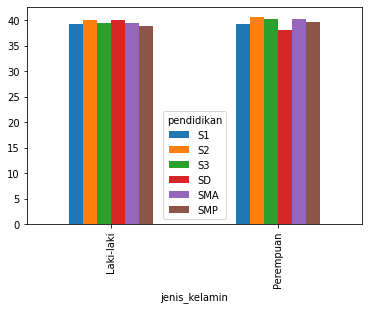

In [14]:
# to fill missing value, we need to understand the concept case by case
# show distribution age by gender and pendidikan


df.groupby(['jenis_kelamin', 'pendidikan'])['umur'].mean().unstack().plot(kind='bar')

In [9]:
# create df_model for modeling, drop all rows with missing value

df_model = df.dropna()

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6881 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           6881 non-null   Int64  
 1   jenis_kelamin  6881 non-null   object 
 2   pekerjaan      6881 non-null   object 
 3   provinsi       6881 non-null   object 
 4   gaji           6881 non-null   float64
 5   is_menikah     6881 non-null   Int64  
 6   is_keturunan   6881 non-null   Int64  
 7   berat          6881 non-null   float64
 8   tinggi         6881 non-null   float64
 9   sampo          6881 non-null   object 
 10  is_merokok     6881 non-null   Int64  
 11  pendidikan     6881 non-null   object 
 12  stress         6881 non-null   float64
 13  botak_prob     6881 non-null   float64
dtypes: Int64(4), float64(5), object(5)
memory usage: 833.2+ KB


In [21]:
col = ['umur', 'jenis_kelamin', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'sampo', 'is_merokok', 'stress', 'botak_prob']
df_model = df_model[col]
df_model.to_csv('data/for_model.csv', index=False)

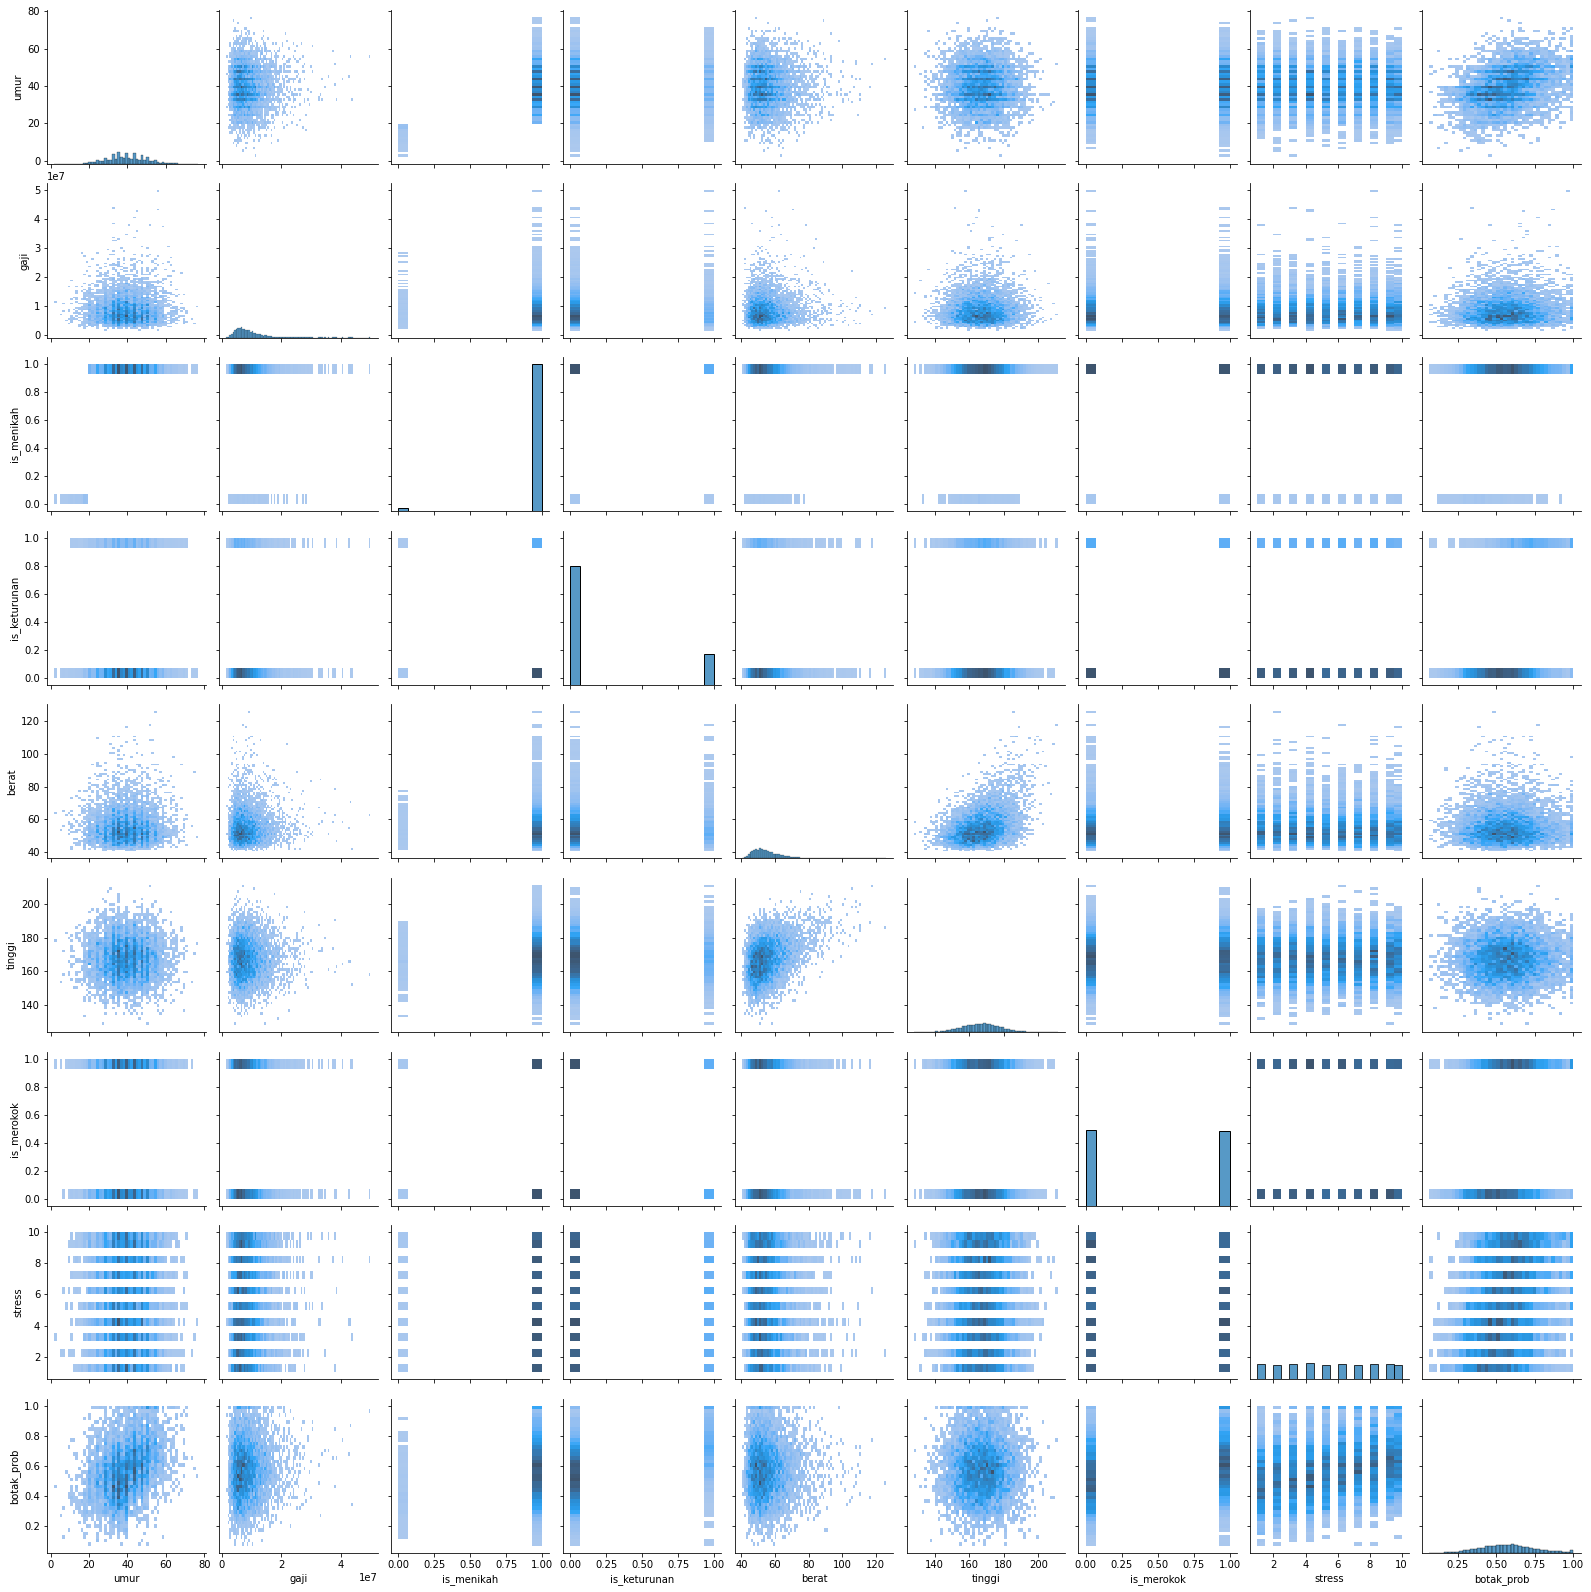

In [16]:
sns.pairplot(df_model, kind = 'hist')

In [ ]:
# we will use umur, jenis_kelamin, gaji, is_menikah, is_married, berat, tinggi, sampo, is_merokok, and stress to predict botak_prob
# we will used one hot encoding for jenis_kelamin, sampo
# we will used sklearn pipeline to preprocess the data


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, rooth_mean_squared_error